# Pooling

In this notebook we discuss the pooling operation in the context of Convolutional Neural Networks (CNNs) or convnets. First, we motivate the need for pooling. Then, present various pooling techniques, followed by their TensorFlow implementations.

There are two motivations for performing pooling in convnets.
- Motivation 1: Invariance to Small Translations
- Motivation 2: Downsampling


## Motivation 1: Invariance to Small Translations

Consider the following three images: A, B and C. Although the images B and C are the same as A, there is small **variance** in these images. Images B and C are shifted on the right by one pixel and two pixels, respectively. Ideally, we want a convnet to recognize these three images as the same image irrespective of their small translations. In other words, we want our convnet to be invariant to small translations.

<img src="http://engineering.unl.edu/images/uploads/Pooling_motivation_1.png" width=800, height=400>

One way to achieve invariance to small translations is by scanning a fixed-size window ($p x p$) over all regions of the input (image or feature map) to create a summary statistic of each of the $p x p$ regions of the image by a single value. This technique is known as **pooling**. The summary statistics of each fixed-size region of the input can be computed either by getting the max pixel value (max pooling) or the mean pixel value (average pooling) of that region. For example, in the figure below a 2 x 2 pooling window is slid over a 6 x 6 input tensor from left to right and top to bottom. At each location that the pooling window scans, it computes the maximum value of the input subtensor in the window.

<img src="http://engineering.unl.edu/images/uploads/Pooling_max_0.png" width=800, height=400>


## Max Pooling: Achieve Invariance to Small Translations

We can use max pooling to achieve invariance to small translations. Below we scan a 2 x 2 pooling window summary over all regions of the 8 x 8 images by a stride of 2. The pooling window simply reads the max value (darker pixel) from the scanned image block, dropping other values. 

<img src="http://engineering.unl.edu/images/uploads/Pooling_motivation_3.png" width=800, height=400>

Observe that the feature map for image A and B are exactly same, indicating 100% invariance. For image C, its feature map is shifted to the right only by one pixel, so we achieved 50% invariance. 


Invariance to local translation can be a very useful property if we care more about whether some feature is present than exactly where it is. For example, when determining whether an image contains a face, we don't need to know the location of the eyes with pixel-perfect accuracy, we just need to know that there is an eye on the left side of the face and an eye on the right side of the face. 


## Pooling: An Infinite Strong Prior
The use of pooling can be viewed as adding an infinitely strong prior that the function the layer learns must be invariant to small translations. When this assumption is correct, it can greatly improve the statistical efficiency of the network.



## Can Pooling achieve rotation & scale invariance?

In a convnet, we add max pooling layers, usually after the convolution blocks to achieve invariance to smaller translations. Max pooling also provides invariance to smaller rotations and scale. 

Let's illustrate how pooling may achieve rotation invariance. Consider handwritten digits classification problem. Say that in the training dataset we have digits that are rotated by some degree. For the sake of simplicity we consider three rotations of the digit "5" in the following figure. The convnet uses three filters to recognize slightly different orientations of the digit 5. As a consequence, for an input image representing "5", the corresponding filter will detect it due to its larger activation. Now let's add a max pooling layer on top of the three filters. Irrespective of which detetor is activated (depending on the prientation of the inpt "5"), the max layer will be be activated. 

Thus, by pooling over the outputs of separately parametrized filters, the features can learn
which rotations to become invariant to.

There is a small caveat though. If the input dataset doesn't contain images with various rotations of "5", then max pooling won't provide invariance to rotations in the test data.

Also, this type of rotation invariance can be achieved by **depthwise pooling** as opposed to the spatial pooling that we have been discussing. We present depthwise pooling later in this notebook. 


<img src="http://engineering.unl.edu/images/uploads/Pooling_RotationInvariance.png" width=600, height=300>


Thus, one motivation to apply pooling (e.g., max pooling) is to mitigate the sensitivity of the convolution layers to location. This is useful for tasks where the predictions don't depend on the exact location of the activation, such as in classification tasks.




## Motivation 2: Downsampling


Another motivation for pooling is to downsample the input. The pooling layer in convnets progressively reduce the spatial size (i.e., width and height) of the input volume. Doing this allows us to reduce the amount of parameters and computation in the network. Pooling also helps us control overfitting.

When performing pooling, we need to set the following three parameters:
- Size of the pooling block
- Stride
- Padding

Often times we perform max pooling along the spatial dimension of the image (or feature map). Less frequently we perform depthwise max pooling. We will discuss depthwise max pooling later.

In spatial max pooling it is a common practice to use stride that is same as the size of the pooling block with "VALID" padding. In other words, we only need to set the pooling size.

In spatial max pooling, a 1 x 1 pooling window is not interesting. The minimum size of the pooling window should be 2 x 2. As the stride has same size, i.e., 2 x 2, the size of the feature map gets reduced by half. In other words, max pooling can be used for downsampling.

In the following illustration a pooling window of size 2 x 2 is used to scan an input tensor of size 4 x 4, with stride 2 and no padding. Observe, the size of the output is reduced by half.


<img src="http://engineering.unl.edu/images/uploads/Pooling_max_3.png" width=600, height=300>

Thus, a $n x n$ input downsampled by a $p x p$ pooling window with $s$ stride results in an output map of side: 
- $\frac{n - p}{s} + 1$


Max pooling improves the efficiency of computation in two ways.
- We can perform downsampling. The input gets shrinked reducing computations.
- The number of parameters gets reduced, which decreases overfitting.



## Pooling: Varying Strides

When pooling is performed with stride 1, the size of the output decreases. This reduction in size can be increased by using larger strides. In the following figure, a 4 x 4 input is reduced to 3 x 3 using a 2 x 2 pooling filter with stride 1.

Notice for every 2 × 2 block, we keep only the largest value, take a single step (like a sliding window), and apply the operation again, thus producing an output volume size of 3 × 3.

We can further decrease the size of our output volume by increasing the stride to length 2 to the same input. For every 2 × 2 block in the input, we keep only the largest value, then take a step of two pixels, and apply the operation again. This pooling allows us to reduce the width and height by a factor of two, effectively discarding 75% of activations from the previous layer.


<img src="http://engineering.unl.edu/images/uploads/Pooling_max_stride1-2.png" width=600, height=300>


## Pooling: Size of Pooling Filter vs Stride


- How do we decide the size of the pooling filter or "pool size" and stride?

There are two variations of pooling used in practice.

- pool size = 2, s = 2 (non-overlapping pooling): It is the most common type of pooling and is applied to images with smaller spatial dimensions.

- pool size = 3, s = 2 (overlapping pooling): It is normally applied to images with large spatial dimensions.




## Pooling: When it is destructive

Since pooling (with pooling window 2 x 2) reduces the size of the output by a factor of 2, the area of the output reduces by a factor of 4. This dramatically cuts down a lot of information. In some tasks this could be very destructive. 
- Image segmentation: we want to classify each pixel, thus cannot afford to collapse information of the input pixels. A desirable property in this case is **equivariance**, i.e., if the input image is translated by one pixel to the right, the output should also be translated by one pixel to the right.
- Pooling is destructive in tasks where it is more important to preserve the location of a feature. For example, if we want to find a corner defined by two edges meeting at a specific orientation, we need to preserve the location of the edges well enough to test whether they meet.



## Alternatives to Max Pooling

The most common pooling technique used in convnets is max pooling. Several alternatives to max pooling exist:
- Average pooling
- p-norm pooling
- Pooling by MLP



# Average Pooling

In average pooling, the pooling window computes the mean value of the scanned region.


<img src="http://engineering.unl.edu/images/uploads/Pooling_average.png" width=600, height=300>


Although average pooling **loses less information** than computing the max, empirically max pooling performs better that average pooling. One reason could be that max pooling offers stronger translation invariance than average pooling. Because max pooling preserves only the strongest features, getting rid of all the meaningless ones, so the next layers get a cleaner signal to work with. Computationally, max pooling is slightly more efficient. 



# p-norm Pooling

Another alternative to max pooling is the is p-norm pooling. The pooling window computes the aggregate value using the following formula. Here $K$ denotes the side of the pooling window.

- $y = \sqrt[p]{\frac{1}{K^2}\sum_{i,j}x_{ij}^p}$


<img src="http://engineering.unl.edu/images/uploads/Pooling_p-norm.png" width=600, height=300>



# Pooling by Multi-Layer Perceptron (MLP)


Note that so far the pooling window did not involve any learnable parameters. We used a fixed function (max/mean/p-norm) to perform the pooling operation. But it is possible to learn a function to perform pooling. For example, a MLP can be used to scan over all regions of the input to compute a single output value for each region. In this case, the same MLP is applied on each input region. Thus, its parameters will be shared, just like convolution filters.


<img src="http://engineering.unl.edu/images/uploads/Pooling_mlp.png" width=600, height=300>

In [1]:
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt

from pylab import imread, gray, imshow

import tensorflow as tf
from tensorflow import keras

## Max Pooling: Python Implementation

We define a Max Pooling 2D class manually using python for performing spatial max pooling (to pool across height and width of an input matrix).

It takes the following input:
- Activated feature map (denoted by $Y$ of dimension num_of_channels $n_k$ x height $n_h$ x width $n_w$)

It requires following two parameters:
- The receptive field size (denoted by "pool_size")
- The stride (denoted by s)

Pooling creates an output volume of size: num_of_filters x height x width
- num_of_filters = $n_k$ (number of input filters)
- height = $\frac{n_h - pool\_size}{s} + 1$
- width = $\frac{n_w - pool\_size}{s} + 1$


## Max Pooling 2D Class

We implement the MaxPooling class using two techniques. The second technique uses the Kears Layer class (https://keras.io/api/layers/).

A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights). 

The benefit of using the Layer class is that a **Layer instance is callable, much like a function**. Thus, it implicitly invokes the call() method to perform the logic of applying the layer to the input tensors (which should be passed in as argument).

In [2]:
class MaxPooling_2D:
    def __init__(self, pool_size, stride):
        self.pool_size = pool_size 
        self.s = stride
    
    # Method to perform pooling
    def forward(self, Y):

        # Get the height and width of input as well as the number of channels 
        n_h, n_w, n_k = Y.shape

        # Create the pooled output (feature map) matrix of dimension: height x width x num_of_filters
        Y_pooled = np.zeros(((n_h - self.pool_size)//self.s + 1, (n_w - self.pool_size)//self.s + 1, n_k))

        # Compute each pooled feature map successively (outer most loop)
        for k_out in range(Y_pooled.shape[2]):
            for i in range(Y_pooled.shape[0]): # Get the x-coordinate of the pooled feature map
                for j in range(Y_pooled.shape[1]): # Get the y-coordinate of the pooled feature map
                    # get the input region for pooling
                    image_region = Y[i*self.s: i*self.s + self.pool_size, 
                                         j*self.s: j*self.s + self.pool_size, k_out] 
                    Y_pooled[i, j, k_out] = np.amax(image_region) # perform max pooling on the given region
            
        return Y_pooled

In [3]:
# This implementation uses the Keras Layer class
class MaxPooling_2D(keras.layers.Layer):
    def __init__(self, pool_size, stride=None, **kwargs):
        super().__init__(**kwargs)
        if stride is None:
            self.s = pool_size
        self.pool_size = pool_size 
        self.s = stride
    
    # Method to perform pooling
    # The "call" method of the Layer class defines the computation from inputs to outputs
    # It is invoked implicitly when an instance of the class is used
    def call(self, Y):
        # Get the height and width of input as well as the number of channels 
        n_h, n_w, n_k = Y.shape

        # Create the pooled output (feature map) matrix of dimension: height x width x num_of_filters
        Y_pooled = np.zeros(((n_h - self.pool_size)//self.s + 1, (n_w - self.pool_size)//self.s + 1, n_k))

        # Compute each pooled feature map successively (outer most loop)
        for k_out in range(Y_pooled.shape[2]):
            for i in range(Y_pooled.shape[0]): # Get the x-coordinate of the pooled feature map
                for j in range(Y_pooled.shape[1]): # Get the y-coordinate of the pooled feature map
                    # get the input region for pooling
                    image_region = Y[i*self.s: i*self.s + self.pool_size, 
                                         j*self.s: j*self.s + self.pool_size, k_out] 
                    Y_pooled[i, j, k_out] = np.amax(image_region) # perform max pooling on the given region
            
        return Y_pooled

## Max Pooling 2D Class: Example

We test the MaxPooling_2D class on an input with a feature map of dimension 4 x 4. We use a fixed pool size 2 x 2 with varying strides 1 and 2, respectively.

In [4]:
# Create an input with a feature map of dimension 4 x 4
Y = np.array([[9., 2., 3., 6.],
              [4., 1., 4., 7.],
              [2., 5., 6., 3.],
              [8., 5., 6., 3.]]).astype("float32")


Y = expand_dims(Y, axis=-1)
print("Shape of Y (feature map): ", Y.shape)
print("Y (feature maps):\n", Y[:, :, 0])



# Perform max pooling with stride 1
max_pool = MaxPooling_2D(pool_size=2, stride=1)
Y_max_pooled = max_pool(Y)
print("\nMax Pooled Y (stride 1):\n", Y_max_pooled[:, :, 0])


# Perform max pooling with stride 2
max_pool = MaxPooling_2D(pool_size=2, stride=2)
Y_max_pooled = max_pool(Y)
print("\nMax Pooled Y (stride 2):\n", Y_max_pooled[:, :, 0])

Shape of Y (feature map):  (4, 4, 1)
Y (feature maps):
 [[9. 2. 3. 6.]
 [4. 1. 4. 7.]
 [2. 5. 6. 3.]
 [8. 5. 6. 3.]]

Max Pooled Y (stride 1):
 [[9. 4. 7.]
 [5. 6. 7.]
 [8. 6. 6.]]

Max Pooled Y (stride 2):
 [[9. 7.]
 [8. 6.]]


## Max Pooling 2D Class: RGB Image Example

We perform max pooling on a RGB image that has three channels. Note that:

- A pooling layer typically works on every input channel independently, so the output depth is the same as the input depth.

Shape of Original Image:  (1002, 668, 3)

pool_size = (5, 5)
stride = 5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


Shape of Max Pooled Image:  (200, 133, 3)


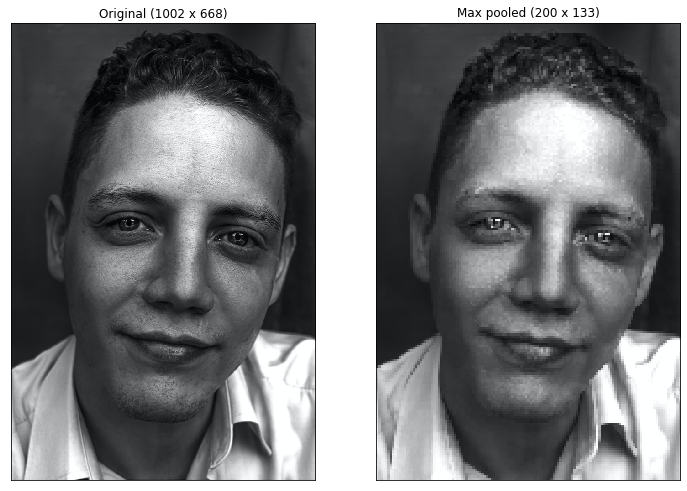

In [5]:
# Read the a RGB image
image_raw = imread("datasets/pics/Face.JPEG")  /255
print("Shape of Original Image: ", image_raw.shape)

# Parameters for the Max Pooling layer
size_of_pooling = 5
stride = size_of_pooling
print("\npool_size = (%d, %d)" % (size_of_pooling, size_of_pooling))
print("stride = %d" % stride)

# Perform max pooling
max_pool = MaxPooling_2D(pool_size=size_of_pooling, stride=stride)
image_max_pooled = max_pool(image_raw)
print("\nShape of Max Pooled Image: ", image_max_pooled.shape)

# Display the original and max pooled images
plt.figure(figsize=(12,12))

plt.subplot(121)
plt.imshow(image_raw, cmap = "gray", interpolation = "nearest")
plt.title("Original (%d x %d)" % (image_raw.shape[0], image_raw.shape[1]))
plt.xticks(())
plt.yticks(())

plt.subplot(122)
plt.imshow(image_max_pooled, cmap = "gray", interpolation = "nearest")
plt.title("Max pooled (%d x %d)" % (image_max_pooled.shape[0], image_max_pooled.shape[1]))
plt.xticks(())
plt.yticks(())

plt.show()

## Max Pooling: TensorFlow Keras Implementation

We can perform max pooling by using TensorFlow Keras' pooling layer:
https://keras.io/api/layers/pooling_layers/

In the demo below we perform max pooling on a 2D array by using the 2D max pooling layer. We need to set the following arguments of tf.keras.layers.MaxPooling2D():
- pool_size: integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.

- strides: Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. **If None, it will default to pool_size**.

- padding: One of "valid" or "same" (case-insensitive). Default setting is "valid".

- data_format: A string, one of channels_last (default) or channels_first. 

        -- Usually we use the default setting of strides (None) and padding (valid).

Input shape:
- If data_format='channels_last': 4D tensor with shape (batch_size, rows, cols, channels).
- If data_format='channels_first': 4D tensor with shape (batch_size, channels, rows, cols).

Output shape:
- If data_format='channels_last': 4D tensor with shape (batch_size, pooled_rows, pooled_cols, channels).
- If data_format='channels_first': 4D tensor with shape (batch_size, channels, pooled_rows, pooled_cols).


## Max Pooling: Example

In [6]:
# Create a constant tensor from a tensor-like object
X = tf.constant([[9., 2., 3., 6.],
                 [4., 1., 4., 7.],
                 [2., 5., 6., 3.],
                 [8., 5., 6., 3.]])

print("Shape of X: ", X.shape)

'''
The tf.keras.MaxPool2D() function requires the input data (image or feature map) to be a 4D tensor: 
    batch_size x rows x columns x number_of_channels
    
We need to add a new dimension at the beginning (size of mini-batch), and 
at the end (number of channels).
'''
X = tf.reshape(X, [1, X.shape[0], X.shape[1], 1])
print("\nX: \n", X[0, :, :, 0])


'''
Perform max pooling.
Note that we didn't set the "strides" and "padding".
Thus their default values will be used.
- strides = None (i.e., equal to the pool_size)
- padding = 'valid'
'''
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)
X_pooled = max_pool_2d(X)
print("\nMax Pooled X: \n", X_pooled[0, :, :, 0])

Shape of X:  (4, 4)

X: 
 tf.Tensor(
[[9. 2. 3. 6.]
 [4. 1. 4. 7.]
 [2. 5. 6. 3.]
 [8. 5. 6. 3.]], shape=(4, 4), dtype=float32)

Max Pooled X: 
 tf.Tensor(
[[9. 7.]
 [8. 6.]], shape=(2, 2), dtype=float32)


## Average Pooling: Example

In [7]:
# Create a constant tensor from a tensor-like object
X = tf.constant([[9., 2., 3., 6.],
                 [4., 1., 4., 7.],
                 [2., 5., 6., 3.],
                 [8., 5., 6., 3.]])


print("Shape of X: ", X.shape)

'''
The tf.keras.AveragePool2D() function requires the input data (image or feature map) to be a 4D tensor: 
    batch_size x rows x columns x number_of_channels
    
We need to add a new dimension at the beginning (size of mini-batch), and 
at the end (number of channels).
'''

X = tf.reshape(X, [1, X.shape[0], X.shape[1], 1])
print("\nX: \n", X[0, :, :, 0])


'''
Perform average pooling.
Note that we didn't set the "strides" and "padding".
Thus their default values will be used.
- strides = None (i.e., equal to the pool_size)
- padding = 'valid'
'''
avg_pool_2d = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))
X_pooled = avg_pool_2d(X)
print("\nAvg. Pooled X: \n", X_pooled[0, :, :, 0])

Shape of X:  (4, 4)

X: 
 tf.Tensor(
[[9. 2. 3. 6.]
 [4. 1. 4. 7.]
 [2. 5. 6. 3.]
 [8. 5. 6. 3.]], shape=(4, 4), dtype=float32)

Avg. Pooled X: 
 tf.Tensor(
[[4.  5. ]
 [5.  4.5]], shape=(2, 2), dtype=float32)


## Max & Average Pooling: RGB Image

We perform both max and average pooling on a RGB image that has three channels. Note that:
- A pooling layer typically works on every input channel independently, so the output depth is the same as the input depth.


pool_size = (5, 5)
strides = (5, 5)
padding = 'VALID'


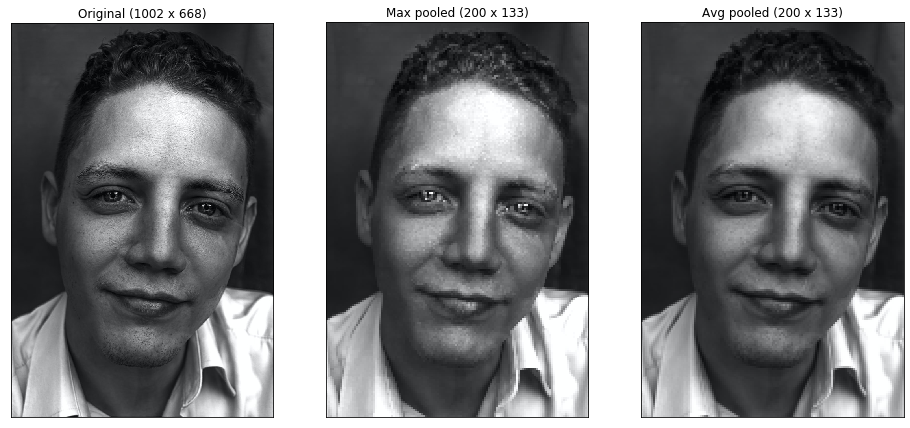

In [8]:
# Read the a RGB image & scale it
image_raw = imread("datasets/pics/Face.JPEG") /255

# Max pooling layer requires the input format to be float 32
image = image_raw.astype('float32') 


'''
The tf.keras.MaxPool2D() & tf.keras.AveragePool2D() functions require the input data (image or feature map) to be a 4D tensor: 
    mini_batch_size x rows x columns x number_of_channels
    
We need to add a new dimension at the beginning (size of mini-batch).
'''
image = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
#print("Shape of Original Image: ", image.shape)


size_of_pooling = 5
print("\npool_size = (%d, %d)" % (size_of_pooling, size_of_pooling))
print("strides = (%d, %d)" % (size_of_pooling, size_of_pooling))
print("padding = 'VALID'")


'''
Perform max pooling.
Note that we didn't set the "strides" and "padding".
Thus their default values will be used.
- strides = None (i.e., equal to the pool_size)
- padding = 'valid'
'''
max_pool = tf.keras.layers.MaxPool2D(pool_size=size_of_pooling)
image_max_pooled = max_pool(image)
#print("\nShape of Max Pooled Image: ", image_max_pooled.shape)


# Perform average pooling
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=size_of_pooling)
image_avg_pooled = avg_pool(image)
#print("\nShape of Average Pooled Image: ", image_avg_pooled.shape)


batch_size, height, width, channels = image_max_pooled.shape

# To display the image, get rid of the batch size by reshaping it
image_max_pooled = tf.keras.backend.reshape(image_max_pooled, shape=(height, width, channels))
image_avg_pooled = tf.keras.backend.reshape(image_avg_pooled, shape=(height, width, channels))

# Display the original, max and average pooled images
plt.figure(figsize=(16,16))

plt.subplot(231)
plt.imshow(image_raw, cmap = "gray", interpolation = "nearest")
plt.title("Original (%d x %d)" % (image_raw.shape[0], image_raw.shape[1]))
plt.xticks(())
plt.yticks(())


plt.subplot(232)
plt.imshow(image_max_pooled, cmap = "gray", interpolation = "nearest")
plt.title("Max pooled (%d x %d)" % (image_max_pooled.shape[0], image_max_pooled.shape[1]))
plt.xticks(())
plt.yticks(())


plt.subplot(233)
plt.imshow(image_avg_pooled, cmap = "gray", interpolation = "nearest")
plt.title("Avg pooled (%d x %d)" % (image_avg_pooled.shape[0], image_max_pooled.shape[1]))
plt.xticks(())
plt.yticks(())
plt.show()

# Omni-Invariance Pooling: Depthwise Max Pooling

So far we have used max and average pooling to learn features that are invariant to small translations.
- Can we design a pooling technique that is invariant under any changes?

Previously we briefly mentioned how to use max pooling for achieving rotation invariance. For example, we need to learn $k$ filters for $k$ possible rotations of the training images reprsenting the digit "5". Then, we have to stack these filters and perform max pooling along the direction of depth. Let's elaborate this technique below.

<img src="http://engineering.unl.edu/images/uploads/Pooling_RotationInvariance.png" width=600, height=300>

To be able to design an omni-invariant pooling strategy, first of all we need to create feature maps for many possible orientation of the same image. For example, in the figure below we have learned multiple feature maps for the same digit accounting for its varying orientation. Note that in the training data must have images representing these orientations.


<img src="http://engineering.unl.edu/images/uploads/Pooling_depthwise_filters.png" width=300, height=100>

Then, we need to perform **max pooling along the depth dimension** (unlike previous scenarios in which we prformed pooling only along spatial dimensions). In the convnet below, the depthwise max pooling layer would ensure that the output is the same regardless of the rotation. The convnet could similarly learn to be invariant to anything else: thickness, brightness, skew, color, and so on.

<img src="http://engineering.unl.edu/images/uploads/Pooling_depthwise_max.png" width=600, height=300>


## Depthwise Max Pooling: Implementation

Since Keras does not provide a depthwise max pooling layer, we use Geron's implementation based on TensorFlow’s low-level Deep Learning API. We use the tf.nn.max_pool() function, and specify the kernel size and strides as 4-tuples (i.e., tuples of size 4). 

The first three values of each should be 1: this indicates that the kernel size and stride along the batch, height, and width dimensions should be 1. The last value should be whatever kernel size and stride you want along the depth dimension—for example, 3 (this must be a divisor of the input depth; it will not work if the previous layer outputs 20 feature maps, since 20 is not a multiple of 3).



## Depthwise Max Pooling: for the Keras Model
We can include depthwise max pooling  as a layer in Keras models. We need to wrap it in a Lambda layer (or create a custom Keras layer):

- depth_pool = keras.layers.Lambda(lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID"))

In [9]:
class DepthMaxPool(keras.layers.Layer):
    def __init__(self, pool_size, strides=None, padding="VALID", **kwargs):
        super().__init__(**kwargs)
        if strides is None:
            strides = pool_size
        self.pool_size = pool_size
        self.strides = strides
        self.padding = padding
    def call(self, inputs):
        return tf.nn.max_pool(inputs,
                              ksize=(1, 1, 1, self.pool_size),
                              strides=(1, 1, 1, self.pool_size),
                              padding=self.padding)


Shape of Depth Pooled Image:  (1, 1002, 668, 1)


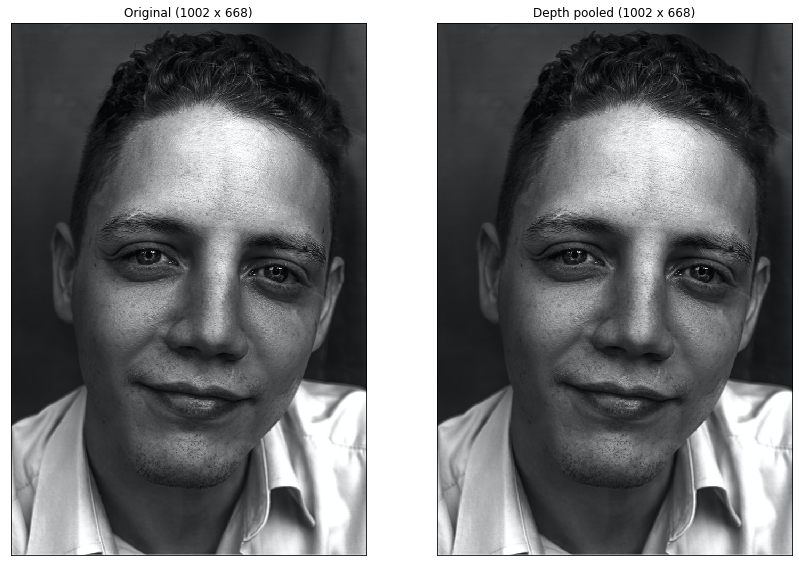

In [10]:
depth_pool = DepthMaxPool(3)

image_depth_pooled = depth_pool(image)
print("\nShape of Depth Pooled Image: ", image_depth_pooled.shape)

batch_size, height, width, channels = image_depth_pooled.shape

# To display the image, get rid of the batch size by reshaping it
image_depth_pooled = tf.keras.backend.reshape(image_depth_pooled, shape=(height, width, channels))


# Display the original and the depthwise max pooled images
plt.figure(figsize=(14,14))

plt.subplot(121)
plt.imshow(image_raw, cmap = "gray", interpolation = "nearest")
plt.title("Original (%d x %d)" % (image_raw.shape[0], image_raw.shape[1]))
plt.xticks(())
plt.yticks(())

plt.subplot(122)
plt.imshow(image_raw, cmap = "gray", interpolation = "nearest")
plt.title("Depth pooled (%d x %d)" % (image_depth_pooled.shape[0], image_depth_pooled.shape[1]))
plt.xticks(())
plt.yticks(())
plt.show()

# Global Average Pooling
Another type of pooling used in modern convnet architectures is known as global average pooling.
- It computes the mean of the entire feature map.

If there are $k$ feature maps, then the global average pooling layer will compute $k$ mean values for each map. This extreme summarization is usually done at the output layer.

# Global Max Pooling
A variant of global pooling is global max pooling. It gets the max value of each feature map.

## Global Average & Max Pooling: Example
We create three 3 x 3 feature maps. Then, we perform global average and max pooling using TensorFlow Keras' keras.layers.GlobalAvgPool2D() and keras.layers.GlobalMaxPool2D() layers, repectively.

It will compute 3 mean & max values using 9 values of each feature map.

In [11]:
'''
Create a constant 3 x 3 x 3 tensor from a tensor-like object
- Each column (9 elements) represents a feature map
- Global average/max will get the mean/max value from each column

'''
X = tf.constant([[[1., 3., 5.],
                  [2., 4., 6.],
                  [1., 3., 5.]],
                 [[1., 3., 5.],
                  [2., 4., 6.],
                  [1., 3., 5.]],
                 [[1., 3., 5.],
                  [2., 4., 6.],
                  [1., 3., 5.]]])
print(X)

'''
The keras.layers.GlobalAvgPool2D() & keras.layers.GlobalMaxPool2D() functions require the input data (image or feature map) to be a 4D tensor: 
    mini_batch_size x rows x columns x number_of_channels
    
We need to add a new dimension at the beginning (size of mini-batch).
'''
X = tf.reshape(X, [1, X.shape[1], X.shape[1], X.shape[0]])
print(X.shape)


'''
Perform global average pooling
'''
global_avg_pool_2d = keras.layers.GlobalAvgPool2D()
global_avg_pooled = global_avg_pool_2d(X)
print("\nGlobal avg pooled values:\n", global_avg_pooled)

'''
Perform global max pooling
'''
global_max_pool_2d = keras.layers.GlobalMaxPool2D()
global_max_pooled = global_max_pool_2d(X)
print("\nGlobal max pooled values:\n",global_max_pooled)

tf.Tensor(
[[[1. 3. 5.]
  [2. 4. 6.]
  [1. 3. 5.]]

 [[1. 3. 5.]
  [2. 4. 6.]
  [1. 3. 5.]]

 [[1. 3. 5.]
  [2. 4. 6.]
  [1. 3. 5.]]], shape=(3, 3, 3), dtype=float32)
(1, 3, 3, 3)

Global avg pooled values:
 tf.Tensor([[1.3333334 3.3333333 5.3333335]], shape=(1, 3), dtype=float32)

Global max pooled values:
 tf.Tensor([[2. 4. 6.]], shape=(1, 3), dtype=float32)
